# Convolution Function

In [32]:
"""
Question (a)

Implement your own conv functions which performs convolution operation without using any neural network packages.
Make sure to handle all possible edge cases to receive full credits.
Keep in mind that height and width of the given image or filter are not always the same.
"""

import numpy as np


def convolution_naive(image, filter, stride=1, padding=0):
    """Performs 2D convolution operation with "4 nested for-loops".

    Args:
    - image: 2D numpy array
    - filter: 2D numpy array
    - stride, padding: integers

    Returns:
    - 2D numpy array : convolution results of the given image and filter.
    - Return None if stride is not compatible. (ex. image of 5*5 with filter 2*2 with stride 2, padding 0)
    - Return None if filter is larger than the given image.
    """

    ##### YOUR CODE #####
    # input image 와 filter의 shape
    (n_H_input, n_W_input) = image.shape
    (f_H, f_W) = filter.shape
    # output image의 shape
    n_H_output = (n_H_input + 2 * padding - f_H) / stride
    n_W_output = (n_W_input + 2 * padding - f_W) / stride

    # filter가 input image보다 큰 경우 return None
    if f_H > n_H_input or f_W > n_W_input:
        return None
    # stride가 compatible하지 않은 경우 return None
    if not n_H_output.is_integer() or not n_W_output.is_integer():
        return None

    # output image의 shape (int)
    n_H_output = int(n_H_output) + 1
    n_W_output = int(n_W_output) + 1

    # output 초기화
    output = np.zeros((n_H_output, n_W_output))
    # padding
    if( padding > 0 ):
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), 'constant', constant_values=0)
    else:
        image_padded = image

    # output image의 각 pixel에 대해 convolution 연산
    for h in range(n_H_output):
        for w in range(n_W_output):
            for i in range(f_H):
                for j in range(f_W):
                    #filter와 input image의 element-wise 곱
                    output[h, w] += image_padded[h*stride + i, w*stride + j] * filter[i, j]
    #####################
    return output

def convolution_vectorized(image, filter, stride=1, padding=0):
    """Performs 2D convolution operation with "less than or equal to 2 nested for-loops".

    Args:
    - image: 2D numpy array
    - filter: 2D numpy array
    - stride, padding: integers

    Returns:
    - 2D numpy array : convolution results of the given image and filter..
    - Return None if stride is not compatible. (ex. image of 5*5 with filter 2*2 with stride 2, padding 0)
    - Return None if filter is larger than the given image.
    """

    ##### YOUR CODE #####
    # input image 와 filter의 shape
    (n_H_input, n_W_input) = image.shape
    (f_H, f_W) = filter.shape
    # output image의 shape
    n_H_output = (n_H_input + 2 * padding - f_H) / stride
    n_W_output = (n_W_input + 2 * padding - f_W) / stride

    # filter가 input image보다 큰 경우 return None
    if f_H > n_H_input or f_W > n_W_input:
        return None
    # stride가 compatible하지 않은 경우 return None
    if not n_H_output.is_integer() or not n_W_output.is_integer():
        return None

    # output image의 shape (int)
    n_H_output = int(n_H_output) + 1
    n_W_output = int(n_W_output) + 1

    # output 초기화
    output = np.zeros((n_H_output, n_W_output))
    # padding
    if( padding > 0 ):
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), 'constant', constant_values=0)
    else:
        image_padded = image

    # output image의 각 pixel에 대해 convolution 연산
    for h in range(n_H_output):
        for w in range(n_W_output):
            # convolution 연산에 필요한 input image의 부분 영역
            input_part = image_padded[ h*stride : h*stride + f_H, w*stride : w*stride + f_W]
            output[h, w] = np.sum(input_part * filter)
    #####################

    return output

In [ ]:
image = np.random.randint(10, size=(256, 256))
filter = np.random.randint(10, size=(16, 16))
stride = 1
padding = 0

print("Compare the time complexity of 2 convolution operations")
print("1. Convolution operation with 4 nested loops")
%timeit -n 3 -r 1 convolution_naive(image, filter, stride, padding)
print("2. Convolution operation with less than or equal to 2 nested loops")
%timeit -n 3 -r 1 convolution_vectorized(image, filter, stride, padding)

Compare the time complexity of 2 convolution operations
1. Convolution operation with 4 nested loops
4.83 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
2. Convolution operation with less than or equal to 2 nested loops
139 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


In [ ]:
image = np.array([[1, 2, 3, 2, 1], [2, 3, 4, 5, 6], [-1, -2, -3, -4, -5], [0, 0, 1, 0, 0], [7, 1, 7, 1, 7]])
filter = np.array([[1, 0], [0, 1]])
stride = 3
padding = 0

# Expected Result for each convolution functions.
# [[4. 8.]
#  [1. 7.]]
print(convolution_naive(image, filter, stride, padding))
print(convolution_vectorized(image, filter, stride, padding))

[[4. 8.]
 [1. 7.]]
[[4. 8.]
 [1. 7.]]


# Import Modules

In [16]:
import cv2
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from sklearn.metrics import f1_score

In [ ]:
"""
import modules you need
"""

# Utils

In [17]:
def plot_dataset(dataloader, grid_width=8, grid_height=2, figure_width=12, figure_height=3, y_hats=None):
    """
    Plots image and labels.

    Do NOT modify this function.
    """
    images, labels = next(iter(dataloader))
    f, ax = plt.subplots(grid_height, grid_width)
    f.set_size_inches(figure_width, figure_height)
    img_idx = 0
    for i in range(0, grid_height):
        for j in range(0, grid_width):
            image = images[img_idx]
            label = labels[img_idx]
            title_color = 'k'
            if y_hats is None:
                label_idx = int(label)
            else:
                label_idx = int(y_hats[img_idx])
                if int(labels[img_idx]) != label_idx:
                    title_color = 'r'
            label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'][label_idx]
            ax[i][j].axis('off')
            ax[i][j].set_title(label, color=title_color)
            ax[i][j].imshow(np.transpose(image, (1, 2, 0)), aspect='auto')
            img_idx += 1
        plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.25)
    plt.show()

In [ ]:
def train(model, train_loader, optimizer):
    """
    Trains the model with training data.

    Do NOT modify this function.
    """
    model.train()
    tqdm_bar = tqdm(train_loader)
    for batch_idx, (image, label) in enumerate(tqdm_bar):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        tqdm_bar.set_description("Epoch {} - train loss: {:.6f}".format(epoch, loss.item()))


def evaluate(model, test_loader):
    """
    Evaluates the trained model with test data.

    Do NOT modify this function.
    """
    model.eval()
    test_loss = 0
    correct = 0
    all_labels = []  # Initialize all_labels
    all_predictions = []  # Initialize all_predictions

    with torch.no_grad():
        for image, label in tqdm(test_loader):
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()

            # Store all labels and predictions for F1 score calculation
            all_labels.extend(label.cpu().numpy())
            all_predictions.extend(prediction.cpu().numpy())

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)

    # Calculate F1 score
    f1 = f1_score(all_labels, all_predictions, average='macro')

    return test_loss, test_accuracy, f1

# CIFAR-10 Data Augmentation

In [18]:
def gaussian_smoothing(image, filter_size=3, sigma=1.0):
    """
    Inputs
    - image: an input image of shape (32,32,3).
    Returns
    - image: image blurred with a Gaussian Filter.

    Do NOT modify this function.
    """
    center = (filter_size-1)/2
    gaussian_filter = np.zeros((filter_size, filter_size))
    for row in range(filter_size):
        for col in range(filter_size):
            gaussian_filter[row, col] = np.exp((-(row-center) ** 2 - (col-center) ** 2) / (2 * sigma ** 2)) / (2 * np.pi * sigma ** 2)
    gaussian_filter = gaussian_filter / np.sum(gaussian_filter)
    image = cv2.filter2D(image, -1, gaussian_filter)
    return image


def color_jitter(image):
    """
    Inputs
    - image: an input image of shape (32,32,3).
    Returns
    - image: image blurred with a Gaussian Filter.

    Do NOT modify this function.
    """
    image = cv2.convertScaleAbs(image, alpha=1.5, beta=20)
    return image

In [19]:
def horizontal_flip(image):
    """Flips the image horizontally.

    Question (b)
    - Do not use TorchVision or OpenCV library for this question.
    - You can solve the problem using numpy only.

    Inputs
    - image: an input image of shape (32, 32, 3).

    Returns
    - image: a horizontally-flipped image of shape (32, 32, 3).
    """
    ##### YOUR CODE #####
    image = np.fliplr(image)
    #####################

    return image

Files already downloaded and verified


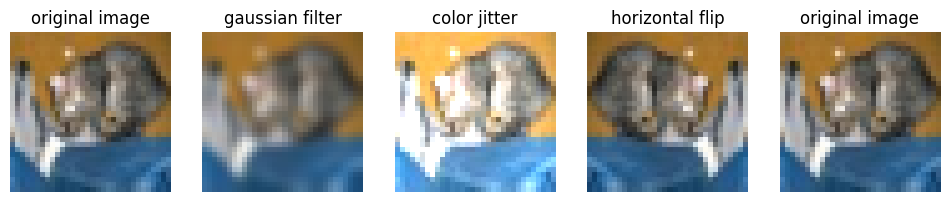

In [20]:
"""
Visualize how the augmentations are applied to a single image.

Do NOT modify.
"""

raw_test = datasets.CIFAR10(root="./CIFAR_10", train=False, download=True)

f, ax = plt.subplots(1, 5)
f.set_size_inches(12, 3)
x = raw_test[0][0]
x = np.array(x)
g = gaussian_smoothing(x)
j = color_jitter(x)
h = horizontal_flip(x)
title = ['original image', 'gaussian filter', 'color jitter', 'horizontal flip', 'original image']
for i, img in enumerate([x, g, j, h, x]):
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(title[i], color='k')

In [ ]:
###
# Question (b)
# Briefly explain whether horizontal flip is a good augmentation method for image classification task.
###
# - Horizontal flip은 대상 이미지에 특별한 방향이 없는 경우 좋은 데이터 augmentation 방법이지만, 이미지의 수평 방향이 데이터 분류에 의미가 있는 경우 사용하지 않는 것이 좋다.
# - 예를 들어 특정 이미지(알파멧 p, q) 등의 경우 horizontal flip을 사용하면 데이터가 완전히 다른 의미가 될 수 있기 때문이다.

In [23]:
class CustomDataset(Dataset):
    def __init__(self, train, prob=0.5, data_dir="./CIFAR_10"):
        """
        Do NOT modify this method.
        """
        self.data = datasets.CIFAR10(root=data_dir, train=train, download=True)
        self.prob = prob

    def __len__(self):
        """
        Do NOT modify this method.
        """
        return len(self.data)

    def __getitem__(self, idx):
        """
        Do NOT modify this method.
        """
        return self.data[idx]

    def transform(self, image):
        """
        Apply stochastic data augmentation to the given image.

        Question (c)
        - Convert the given RGB image into BGR scale using opencv library.
        - Apply random augmentation (gaussian smoothing, color jitter, and horizontal flip).
        - Random augmentation is applied with the probability of self.prob.
        - If self.prob = 0.5, 5 out of 10 images will be augmented on average.
        - Convert the augmented image back to RGB scale for training.

        Inputs
        - image: numpy array of an input image of shape (32,32,3).
        Returns
        - image: numpy array of the augmented input image with shape (32,32,3).
        """
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        ##### YOUR CODE #####
        # self.prob의 확률로 random augmentation 적용
        if np.random.rand() < self.prob:
            # 3가지 augmentation 중 랜덤하게 선택
            aug = np.random.randint(3)
            if aug == 0:
                image = gaussian_smoothing(image)
            elif aug == 1:
                image = color_jitter(image)
            elif aug == 2:
                image = horizontal_flip(image)
        #####################

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image

    def collate_fn(self, data):
        """
        Creates a batch of images and label tensors.

        Question (d)
        - Convert each image in the batch from PIL image to numpy array.
        - Transform the image using self.transform method to apply random augmentation.
        - Normalize the transformed image by mapping the range [0, 255] to range [0, 1].
        - Transpose the (H * W * C) format of the image into (C * H * W) format.
          - To be specific, the dimension of the original image is (32, 32, 3).
          - We want the dimension of the transposed image to be (3, 32, 32).
        - Convert the batch of preprocessed images into PyTorch float tensors.
        - Convert the batch of labels into PyTorch long tensors.
        - Do NOT use torchvision.transforms library!

        Inputs
        - list of tuples, each containing a PIL image and an integer label
        - number of tuples in the list == BATCH SIZE

        Returns
        - batch of image tensors, batch of label tensors
        - size: (BATCH, CHANNEL, HEIGHT, WIDTH), (BATCH)
        """
        batch_x, batch_y = [], []

        ##### YOUR CODE #####
        for image, label in data:
            # PIL image를 numpy array로 변환
            image = np.array(image)
            # transform 적용(self.prob에 따라 내부적으로 랜덤하게 처림)
            image = self.transform(image)
            # Normalize [0,255] -> [0, 1]
            image = image.astype(np.float32) / 255.0
            # (H * W * C) -> (C * H * W) ( (0, 1, 2) -> (2, 0, 1) )
            image = np.transpose(image, (2, 0, 1))
            # image와 label을 batch_x, batch_y에 추가
            batch_x.append(image)
            batch_y.append(label)

        # 배치 데이터 array를 PyTorch tensor로 변환
        batch_x = torch.tensor(batch_x, dtype=torch.float32)
        batch_y = torch.tensor(batch_y, dtype=torch.long)

        #####################

        return batch_x, batch_y


Files already downloaded and verified


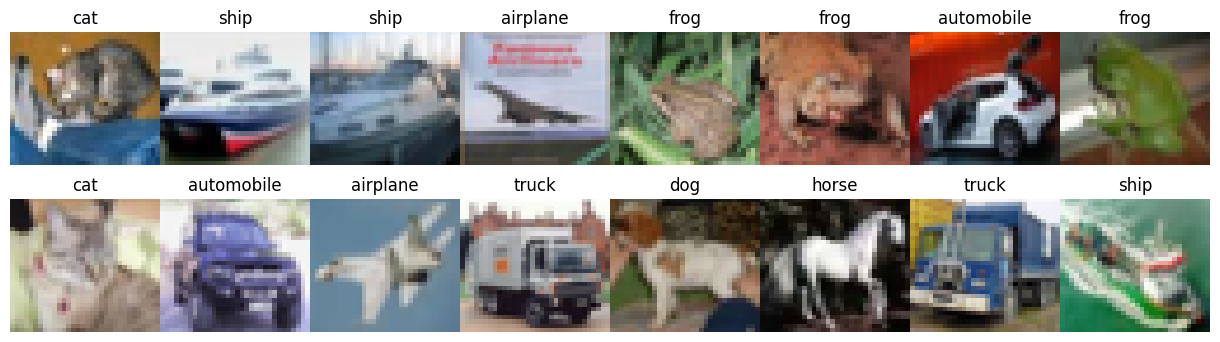

In [24]:
"""
Plot some example images and class labels without applying data augmentation.

Do NOT modify.
"""

raw_test_dataset = CustomDataset(train=False, prob=0, data_dir="./CIFAR_10")
raw_test_loader = DataLoader(dataset=raw_test_dataset, batch_size=16, shuffle=False, collate_fn=raw_test_dataset.collate_fn)

plot_dataset(raw_test_loader)

Files already downloaded and verified
Files already downloaded and verified


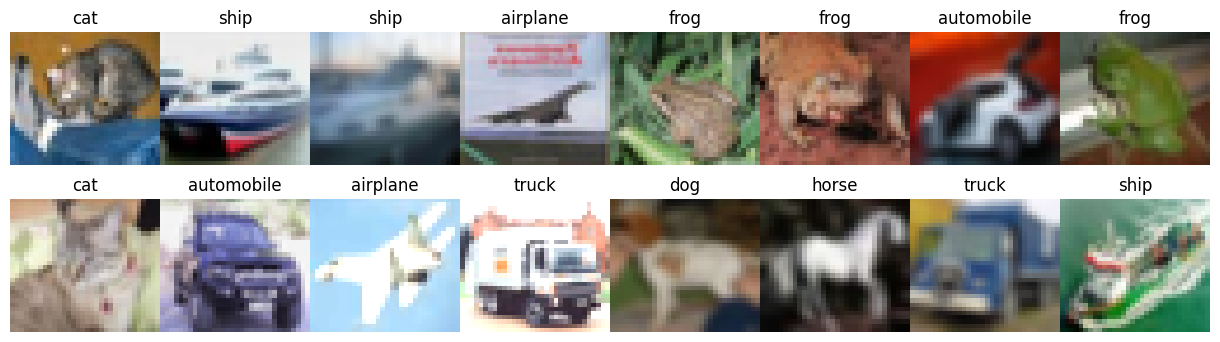

In [25]:
"""
Same examples after applying data augmentation with 50% probability.
If your transform (c) and collate_fn (d) methods have been implemented well, some of the results should look different from the ones above.

Do NOT modify.
"""

train_dataset = CustomDataset(train=True, prob=0.5)
test_dataset = CustomDataset(train=False, prob=0.5)

BATCH_SIZE = 64

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          collate_fn=train_dataset.collate_fn)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         collate_fn=test_dataset.collate_fn)

plot_dataset(test_loader)

# ConvNet Image Classification

In [ ]:
###
# Question (e)
# Train your ConvNet to achieve test accuracy above 70%
# You can try or add other training options such as SGD or callbacks to schedule learning rates if you want.
###

In [26]:
class ConvNet(nn.Module):
    """
    Builds a ConvNet model.

    Question (e)
    - things that might be useful...
    - stack [Conv2D + Conv2D + MaxPool2D] at least three times,
    - follwed by at least three Linear layers.
    - 3x3 filter is enough, but feel free to use larger filter size.
    - channels used: [10, 32, 64, 128, 256, 512, 1024]
    - you can choose smaller or larger channel size as well.
    - The model may include BatchNormalization, regularizers, and Dropout, but they are not necessary.
    """
    def __init__(self):
        """
        Define the layers that you would like to use in your model.
        """
        super(ConvNet, self).__init__()

        ##### YOUR CODE #####
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 4 * 4, 1024)
        self.bn_fc1 = nn.BatchNorm1d(1024)
        self.fc2 = nn.Linear(1024, 512)
        self.bn_fc2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 10)

        # dropout layer
        self.dropout = nn.Dropout(0.5)

        #####################

    def forward(self, x):
        """
        Apply forward pass of the given batch of input images.
        Inputs
        - x: batch of input images.
        Returns
        - softmax probabilites of the input image for each class label
        """

        ##### YOUR CODE #####
        x = F.relu(self.bn1(self.conv1(x)))  # (3, 32, 32) -> (32, 32, 32)
        x = F.relu(self.bn2(self.conv2(x)))  # (32, 32, 32) -> (64, 32, 32)
        x = self.pool1(x)                    # (64, 32, 32) -> (64, 16, 16)

        x = F.relu(self.bn3(self.conv3(x)))  # (64, 16, 16) -> (128, 16, 16)
        x = F.relu(self.bn4(self.conv4(x)))  # (128, 16, 16) -> (128, 16, 16)
        x = self.pool2(x)                    # (128, 16, 16) -> (128, 8, 8)

        x = F.relu(self.bn5(self.conv5(x)))  # (128, 8, 8) -> (256, 8, 8)
        x = F.relu(self.bn6(self.conv6(x)))  # (256, 8, 8) -> (256, 8, 8
        x = self.pool3(x)                    # (256, 8, 8) -> (256, 4, 4)

        # tensor를 1차원으로 변환 (배치 데이터의 수는 유지)
        x = x.view(-1, 256 * 4 * 4)          # (256, 4, 4) -> (256 * 4 * 4)

        # fully connected layers ( drop out 적용)
        x = F.relu(self.bn_fc1(self.fc1(x)))    # (256 * 4 * 4) -> (N, 1024)
        x = self.dropout(x)
        x = F.relu(self.bn_fc2(self.fc2(x)))     # (1024) -> (512)
        x = self.dropout(x)
        x = self.fc3(x)                         # (512) -> (10)
        #####################

        return x

In [29]:
"""
Make sure your runtime type is GPU and you are using PyTorch version higher than 1.8!

Do NOT modify.
"""

DEVICE = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu') # for GPU
#DEVICE = torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu') # for Silicon Mac
print("Using PyTorch version: {}, Device: {}".format(torch.__version__, DEVICE))



Using PyTorch version: 2.3.0+cu121, Device: cuda


In [30]:
"""
Load your customized model "ConvNet" and its training settings.
You may choose the number of epochs that you would like to train.
You might want to use different optimizers or learning rates.
"""

EPOCHS = 20
model = ConvNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
# add learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
criterion = nn.CrossEntropyLoss()

print(model)

ConvNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_ru

In [31]:
"""
Train your model "ConvNet" with the augmented CIFAR-10 dataset.
Upon successful training, test accuracy of your model should be above 70%.

Do NOT modify.
"""

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy, test_f1_score = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tModel: ConvNet, \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f}, \tTest F1_Score: {:.4f} % \n".format(
        epoch, test_loss, test_accuracy, test_f1_score))

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 1], 	Model: ConvNet, 	Test Loss: 0.0142, 	Test Accuracy: 68.72, 	Test F1_Score: 0.6837 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 2], 	Model: ConvNet, 	Test Loss: 0.0114, 	Test Accuracy: 74.80, 	Test F1_Score: 0.7484 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 3], 	Model: ConvNet, 	Test Loss: 0.0107, 	Test Accuracy: 76.35, 	Test F1_Score: 0.7587 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 4], 	Model: ConvNet, 	Test Loss: 0.0095, 	Test Accuracy: 79.51, 	Test F1_Score: 0.7923 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 5], 	Model: ConvNet, 	Test Loss: 0.0100, 	Test Accuracy: 78.12, 	Test F1_Score: 0.7841 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 6], 	Model: ConvNet, 	Test Loss: 0.0081, 	Test Accuracy: 82.12, 	Test F1_Score: 0.8198 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 7], 	Model: ConvNet, 	Test Loss: 0.0085, 	Test Accuracy: 81.56, 	Test F1_Score: 0.8140 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 8], 	Model: ConvNet, 	Test Loss: 0.0085, 	Test Accuracy: 81.52, 	Test F1_Score: 0.8143 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 9], 	Model: ConvNet, 	Test Loss: 0.0079, 	Test Accuracy: 83.42, 	Test F1_Score: 0.8325 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 10], 	Model: ConvNet, 	Test Loss: 0.0082, 	Test Accuracy: 82.52, 	Test F1_Score: 0.8254 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 11], 	Model: ConvNet, 	Test Loss: 0.0073, 	Test Accuracy: 84.28, 	Test F1_Score: 0.8419 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 12], 	Model: ConvNet, 	Test Loss: 0.0074, 	Test Accuracy: 84.08, 	Test F1_Score: 0.8393 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 13], 	Model: ConvNet, 	Test Loss: 0.0085, 	Test Accuracy: 82.45, 	Test F1_Score: 0.8251 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 14], 	Model: ConvNet, 	Test Loss: 0.0076, 	Test Accuracy: 83.99, 	Test F1_Score: 0.8421 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 15], 	Model: ConvNet, 	Test Loss: 0.0086, 	Test Accuracy: 82.44, 	Test F1_Score: 0.8282 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 16], 	Model: ConvNet, 	Test Loss: 0.0082, 	Test Accuracy: 83.44, 	Test F1_Score: 0.8340 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 17], 	Model: ConvNet, 	Test Loss: 0.0081, 	Test Accuracy: 83.41, 	Test F1_Score: 0.8338 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 18], 	Model: ConvNet, 	Test Loss: 0.0080, 	Test Accuracy: 83.33, 	Test F1_Score: 0.8320 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 19], 	Model: ConvNet, 	Test Loss: 0.0076, 	Test Accuracy: 84.86, 	Test F1_Score: 0.8485 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 20], 	Model: ConvNet, 	Test Loss: 0.0071, 	Test Accuracy: 85.27, 	Test F1_Score: 0.8524 % 



In [33]:
###
# Question (f)
# Explain the difference of Accuracy and F1 score.
# Additionally, discuss in what situations it is advantageous to use the F1 Score.
###

# Answer(f)
# - 정확도(Accuracy)는 클래스에 관계없이 모든 클래스의 예측 성공률을 측정하는 반면,
# - F1 score는 소수 클래스의 예측 성능도 잘 반영할 수 있다(클래스 불균형에 강하다))
# - 따라서 클래스 불균형한 경우, 대부분의 샘플이 한 클래스에 속하면 높은 정확도를 쉽게 얻을 수 있기에, 이러한 경우 F1 score를 사용하는 것이 더 적절하다.(소수 클래스의 예측 성능이 나쁠 경우 낮은 F1 score를 얻게 된다.)
# - 또한 F1 score는 오류 유형을 고려하기에 FP, FN의 비용이 중요한 상황에서 유용할 수 있다.(예를 들어, 의료 진단 등)